<a href="https://colab.research.google.com/github/masyitah-abu/Sensor-Data-Analysis-using-Machine-Learning/blob/main/Sensor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting Room Occupancy Using Machine Learning and Sensor Data**


**Introduction.**

To detect room occupancy can be done based on motion, body heat, CO2, Noise, temperature, humidity and particulates. Based on the data collected, this project will build a binary classification model to predict whether a room is occupied or not (0 for unoccupied and 1 for occupied).

**Objectives.**

1. To develop a binary classification model to detect occupancy based on sensor data.
2. Evaluate the performance of the model
3. Optimize the model using hyperparameter tuning and feature selection



**Dataset.**

Dataset use is provided by Luis Candanedo which is available at the UCI Machine Learning repository. The dataset consists of 20560 instances with 7 features. The dataset is divided into a training set (8143 instances) and two test sets (2665 instances and 9752 instances representatively).

Link to [dataset](https://archive.ics.uci.edu/dataset/357/occupancy+detection)


**Workflow**

1. Exploratory Data Analysis
2. Data Preprocessing
3. Develop the model
4. Evaluate the model
5. Select the best model

## Exploratory Data Analysis

In [16]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#install package
!pip install pycaret

In [18]:
#import package
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#call dataset
data = pd.read_csv('/content/drive/MyDrive/AIMST/Sensor Data Analysis/Dataset/datatraining.txt') #training dataset
df = pd.DataFrame(data)

#import the test and validation dataset
test_data = pd.read_csv('/content/drive/MyDrive/AIMST/Sensor Data Analysis/Dataset/datatest.txt') #testing dataset
df_test = pd.DataFrame(test_data)
validation_data = pd.read_csv('/content/drive/MyDrive/AIMST/Sensor Data Analysis/Dataset/datatest2.txt') #validation dataset
df_val = pd.DataFrame(validation_data)

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


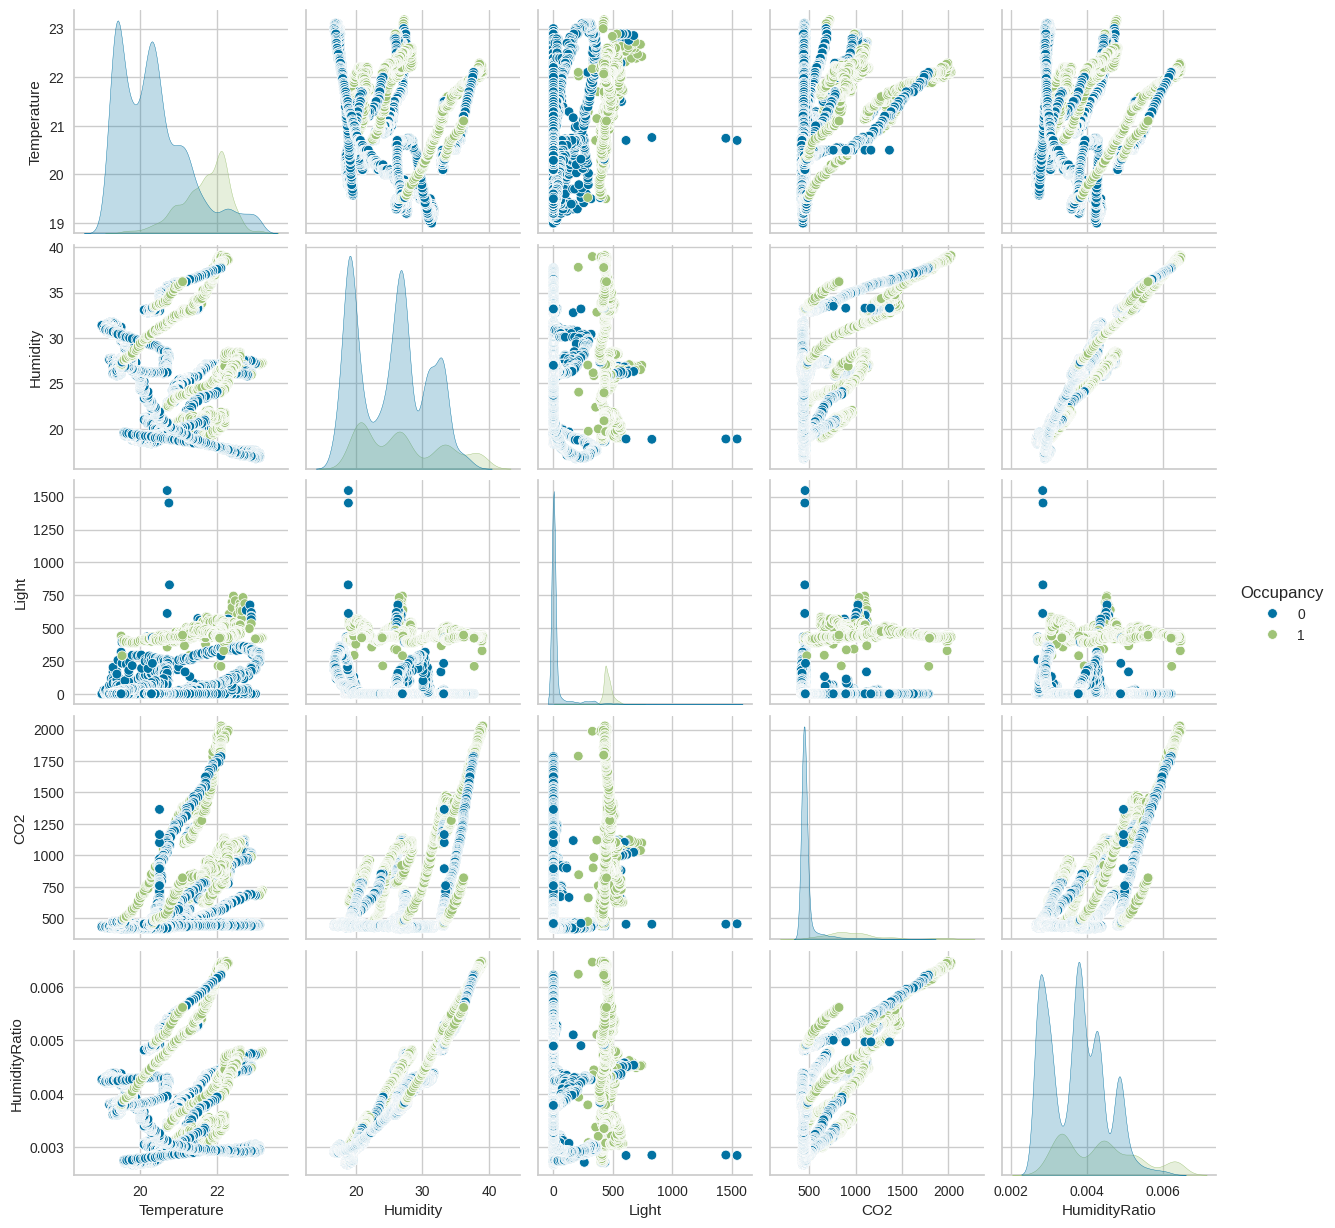

In [19]:
#diplay the dataset
df.shape
df.head()
df.info()
df.describe().T
sns.pairplot(df, diag_kind='kde', hue = 'Occupancy') #pairwise relationship


## Data Preprocessing

In [20]:
#check for missing values and fixing the imbalanced dataset
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [date, Temperature, Humidity, Light, CO2, HumidityRatio, Occupancy]
Index: []


## Develop the model

### Model 1

In [38]:
#Feature Selection (the dataset select)
#model dataset 1
data = df[['CO2', 'Light',  'Occupancy']]

In [39]:
#trained model
from pycaret.classification import *
experiment = setup(data, target='Occupancy', fix_imbalance=True)

,Description,Value
0,Session id,3551
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(8143, 3)"
4,Transformed data shape,"(11423, 3)"
5,Transformed train set shape,"(8980, 3)"
6,Transformed test set shape,"(2443, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [40]:
rf_classifier = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9912,0.9984,0.9917,0.9677,0.9796,0.9740,0.9741
1,0.9912,0.9970,1.0000,0.9603,0.9798,0.9742,0.9745
2,0.9930,0.9984,0.9917,0.9756,0.9836,0.9791,0.9792
3,0.9895,0.9930,0.9917,0.9600,0.9756,0.9689,0.9691
4,0.9895,0.9993,0.9917,0.9600,0.9756,0.9689,0.9691
5,0.9912,0.9968,0.9917,0.9677,0.9796,0.9740,0.9741
6,0.9807,0.9914,0.9917,0.9231,0.9562,0.9438,0.9448
7,0.9877,0.9976,0.9917,0.9524,0.9717,0.9638,0.9641
8,0.9912,0.9972,0.9917,0.9677,0.9796,0.9740,0.9741


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
tuned_model = tune_model(rf_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9877,0.9983,0.9917,0.9524,0.9717,0.9638,0.9641
1,0.9860,0.9958,0.9835,0.9520,0.9675,0.9585,0.9587
2,0.9912,0.9967,1.0000,0.9603,0.9798,0.9742,0.9745
3,0.9877,0.9945,0.9917,0.9524,0.9717,0.9638,0.9641
4,0.9895,0.9977,1.0000,0.9528,0.9758,0.9691,0.9695
5,0.9947,0.9972,1.0000,0.9758,0.9878,0.9844,0.9845
6,0.9789,0.9873,0.9917,0.9160,0.9524,0.9389,0.9401
7,0.9825,0.9951,1.0000,0.9237,0.9603,0.9491,0.9503
8,0.9895,0.9968,0.9917,0.9600,0.9756,0.9689,0.9691


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
final_rf = finalize_model(tuned_model)

### Model 2

In [45]:
data2 = df[['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

In [46]:
experiment_2 = setup(data2, target='Occupancy',fix_imbalance=True)

,Description,Value
0,Session id,651
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(8143, 5)"
4,Transformed data shape,"(11423, 5)"
5,Transformed train set shape,"(8980, 5)"
6,Transformed test set shape,"(2443, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [47]:
model_2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9842,0.9959,0.9917,0.9375,0.9639,0.9538,0.9544
1,0.9895,0.9994,0.9835,0.9675,0.9754,0.9687,0.9688
2,0.9930,0.9998,0.9835,0.9835,0.9835,0.9790,0.9790
3,0.9930,0.9998,0.9835,0.9835,0.9835,0.9790,0.9790
4,0.9912,0.9945,0.9917,0.9677,0.9796,0.9740,0.9741
5,0.9965,0.9999,0.9917,0.9917,0.9917,0.9895,0.9895
6,0.9947,0.9999,0.9917,0.9836,0.9877,0.9843,0.9843
7,0.9912,0.9984,0.9917,0.9677,0.9796,0.9740,0.9741
8,0.9947,0.9997,0.9917,0.9836,0.9877,0.9843,0.9843


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
model_2_et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,0.9993,0.9835,0.9370,0.9597,0.9485,0.9489
1,0.9877,0.9996,0.9752,0.9672,0.9712,0.9634,0.9634
2,0.9965,1.0000,0.9917,0.9917,0.9917,0.9895,0.9895
3,0.9912,0.9998,0.9835,0.9754,0.9794,0.9738,0.9739
4,0.9895,0.9985,0.9917,0.9600,0.9756,0.9689,0.9691
5,0.9965,0.9998,0.9835,1.0000,0.9917,0.9894,0.9895
6,0.9947,0.9999,0.9917,0.9836,0.9877,0.9843,0.9843
7,0.9912,0.9997,0.9917,0.9677,0.9796,0.9740,0.9741
8,0.9947,0.9999,0.9917,0.9836,0.9877,0.9843,0.9843


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
final_rf_model2 = finalize_model(model_2)
final_et_model2 = finalize_model(model_2_et)

## Performance Evaluation

For Classification problems, there are **3 key performance metrics** that are used to assess how well your model is performing. There are accuracy, precision, and recall.

**Accuracy:** measures what percentage of predictions were correct.

**Tip:** The higher the better.

**Precision:** measures what percentage of positive predictions were correct.

**Recall:** measures what percentage of positive instances (Occupancy) did the model catch.

**F1 Score:** The F1 score is defined as the harmonic mean of the model’s precision and recall. It is a metric for how accurate a model is on a given dataset, particularly for binary classification problems.

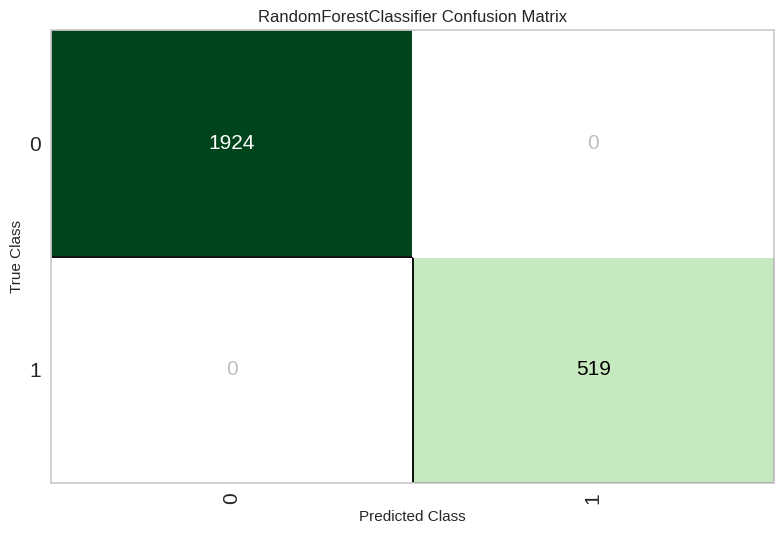

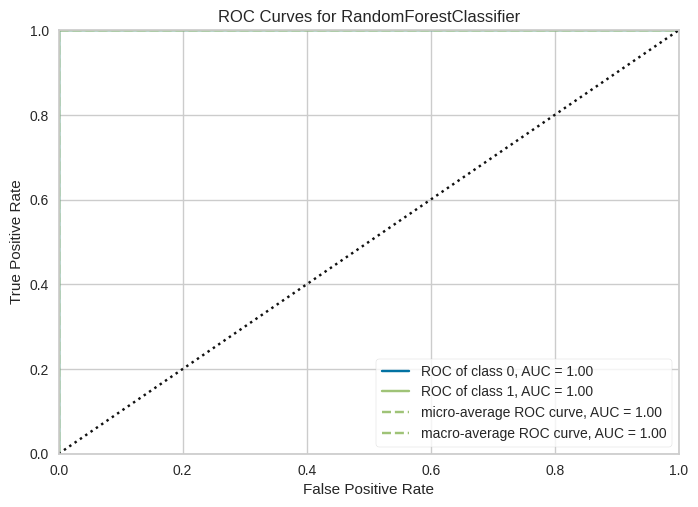

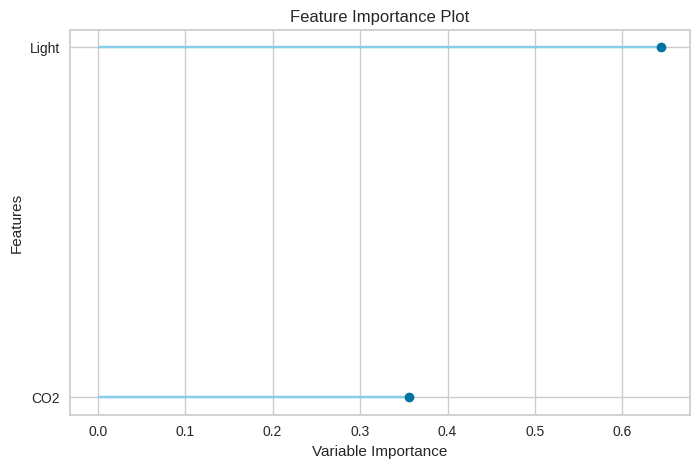

In [44]:
#For Model 1
plot_model(final_rf, plot = 'confusion_matrix')
plot_model(final_rf, plot = 'auc')
plot_model(final_rf, plot = 'feature')

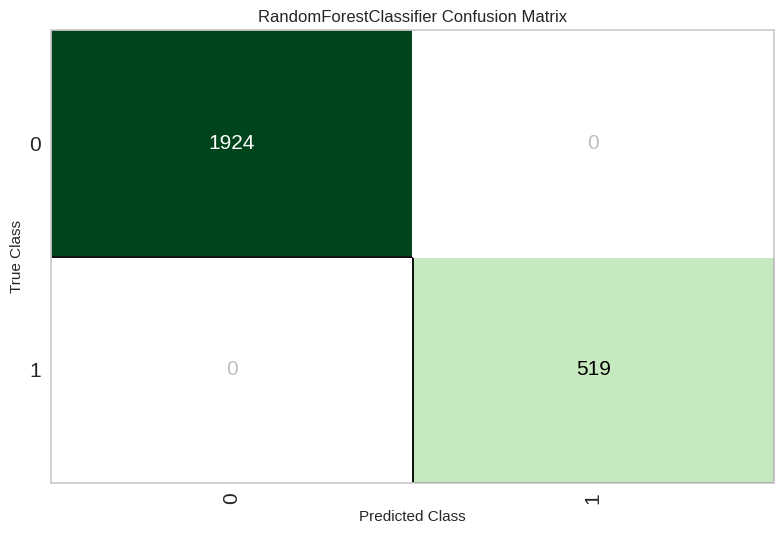

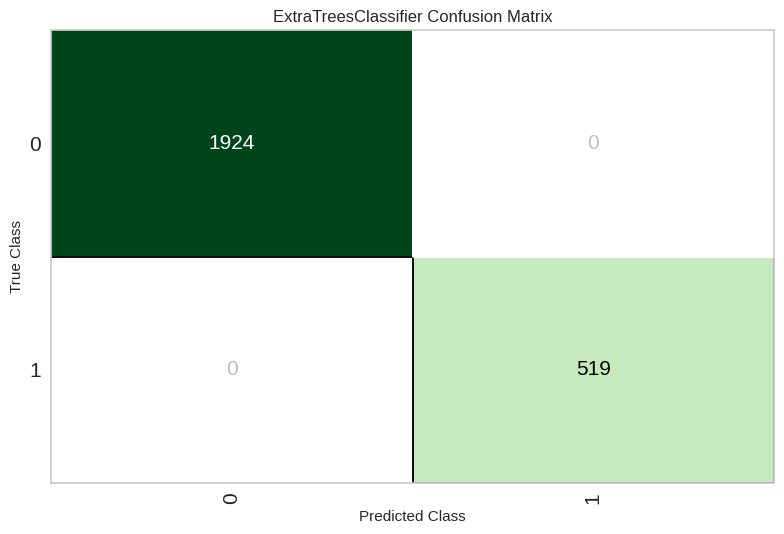

In [51]:
#Model 2
plot_model(final_rf_model2, plot = 'confusion_matrix')
plot_model(final_et_model2, plot = 'confusion_matrix')

In [52]:
#the score of probability of the prediction
unseen_predictions = predict_model(final_rf_model2, data=df_test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9538,0.9855,0.9290,0.9436,0.9362,0.9001,0.9001


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,prediction_label,prediction_score
140,2015-02-02 14:19:00,23.700001,26.271999,585.200012,749.200012,0.004764,1,1,0.68
141,2015-02-02 14:19:59,23.718000,26.290001,578.400024,760.400024,0.004773,1,1,0.62
142,2015-02-02 14:21:00,23.730000,26.230000,572.666687,769.666687,0.004765,1,1,0.62
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1,1,0.89
144,2015-02-02 14:23:00,23.754000,26.200001,488.600006,779.000000,0.004767,1,1,0.89


### Reference

https://medium.com/@tosirike/detecting-room-occupancy-using-machine-learning-and-sensor-data-6a3098c13ed4